# Querying the *flight phase files*
We introduce here some new methods to select the flight segments, querying for different criteria.

## Data access
* To analyse the data they first have to be loaded by importing the (AC)³airborne meta data catalogue. To do so the ac3airborne package has to be installed. More information on how to do that and about the catalog can be found [here](https://github.com/igmk/ac3airborne-intake#ac3airborne-intake-catalogue).

## Get data

In [1]:
import ac3airborne

In [2]:
cat = ac3airborne.get_intake_catalog()
list(cat.P5.GPS_INS)

['ACLOUD_P5_RF04',
 'ACLOUD_P5_RF05',
 'ACLOUD_P5_RF06',
 'ACLOUD_P5_RF07',
 'ACLOUD_P5_RF08',
 'ACLOUD_P5_RF10',
 'ACLOUD_P5_RF11',
 'ACLOUD_P5_RF13',
 'ACLOUD_P5_RF14',
 'ACLOUD_P5_RF15',
 'ACLOUD_P5_RF16',
 'ACLOUD_P5_RF17',
 'ACLOUD_P5_RF18',
 'ACLOUD_P5_RF19',
 'ACLOUD_P5_RF20',
 'ACLOUD_P5_RF21',
 'ACLOUD_P5_RF22',
 'ACLOUD_P5_RF23',
 'ACLOUD_P5_RF25',
 'AFLUX_P5_RF02',
 'AFLUX_P5_RF03',
 'AFLUX_P5_RF04',
 'AFLUX_P5_RF05',
 'AFLUX_P5_RF06',
 'AFLUX_P5_RF07',
 'AFLUX_P5_RF08',
 'AFLUX_P5_RF09',
 'AFLUX_P5_RF10',
 'AFLUX_P5_RF11',
 'AFLUX_P5_RF12',
 'AFLUX_P5_RF13',
 'AFLUX_P5_RF14',
 'AFLUX_P5_RF15',
 'MOSAiC-ACA_P5_RF02',
 'MOSAiC-ACA_P5_RF03',
 'MOSAiC-ACA_P5_RF04',
 'MOSAiC-ACA_P5_RF05',
 'MOSAiC-ACA_P5_RF06',
 'MOSAiC-ACA_P5_RF07',
 'MOSAiC-ACA_P5_RF08',
 'MOSAiC-ACA_P5_RF09',
 'MOSAiC-ACA_P5_RF10',
 'MOSAiC-ACA_P5_RF11']

```{note}
Have a look at the attributes of the xarray dataset `ds_gps` for all relevant information on the dataset, such as author, contact, or citation information.
```

In this example we want to look at `ACLOUD_P5_RF14`. First we read the GPS information:

In [3]:
ds_gps = cat['P5']['GPS_INS']['ACLOUD_P5_RF14'].to_dask()
ds_gps

Invalid MIT-MAGIC-COOKIE-1 key

<xarray.Dataset>
Dimensions:  (time: 20211)
Coordinates:
  * time     (time) datetime64[ns] 2017-06-08T07:22:07 ... 2017-06-08T12:59:07
Data variables:
    alt      (time) float64 ...
    tas      (time) float64 ...
    lat      (time) float64 ...
    lat_dir  (time) object ...
    lon      (time) float64 ...
    lon_dir  (time) object ...
    vs       (time) float64 ...
    gs       (time) float64 ...
    pitch    (time) float64 ...
    roll     (time) float64 ...
    heading  (time) float64 ...
Attributes: (12/14)
    description:  1Hz subset based on GPS1 and INS data processed by AWI engi...
    instruments:  GPS1 and INS
    version:      [0.1]
    contact:      mario.mech@uni-koeln.de, martin.gehrmann@awi.de
    institution:  ['Alfred-Wegener-Institut Helmholtz-Zentrum für Polar- und ...
    author:       Dr. Mario Mech
    ...           ...
    featureType:  trajectory
    mission:      ACLOUD
    platform:     Polar5
    flight_id:    RF14
    title:        Polar5 position and attitude data
    history:      acquired by Polar5 during ACLOUD campaign, quality checked ...

## Load Polar 5 flight phase information
Polar 5 flights are divided into segments to easily access start and end times of flight patterns. For more information have a look at the respective [github](https://github.com/igmk/flight-phase-separation) repository.

At first we want to load the flight segments of (AC)³airborne

In [4]:
meta = ac3airborne.get_flight_segments() 

In order to simplify things we can import the module `flightphase` from the `ac3airborne.tools`.

In [5]:
from ac3airborne.tools import flightphase

The next step is to select the flight segments of our flight:

In [6]:
flight = meta['P5']['ACLOUD_P5_RF14']

In [7]:
flight_query = flightphase.FlightPhaseFile(flight)

## Plots
First, the entire flight is plotted:

In [8]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
plt.style.use("../mplstyle/book")

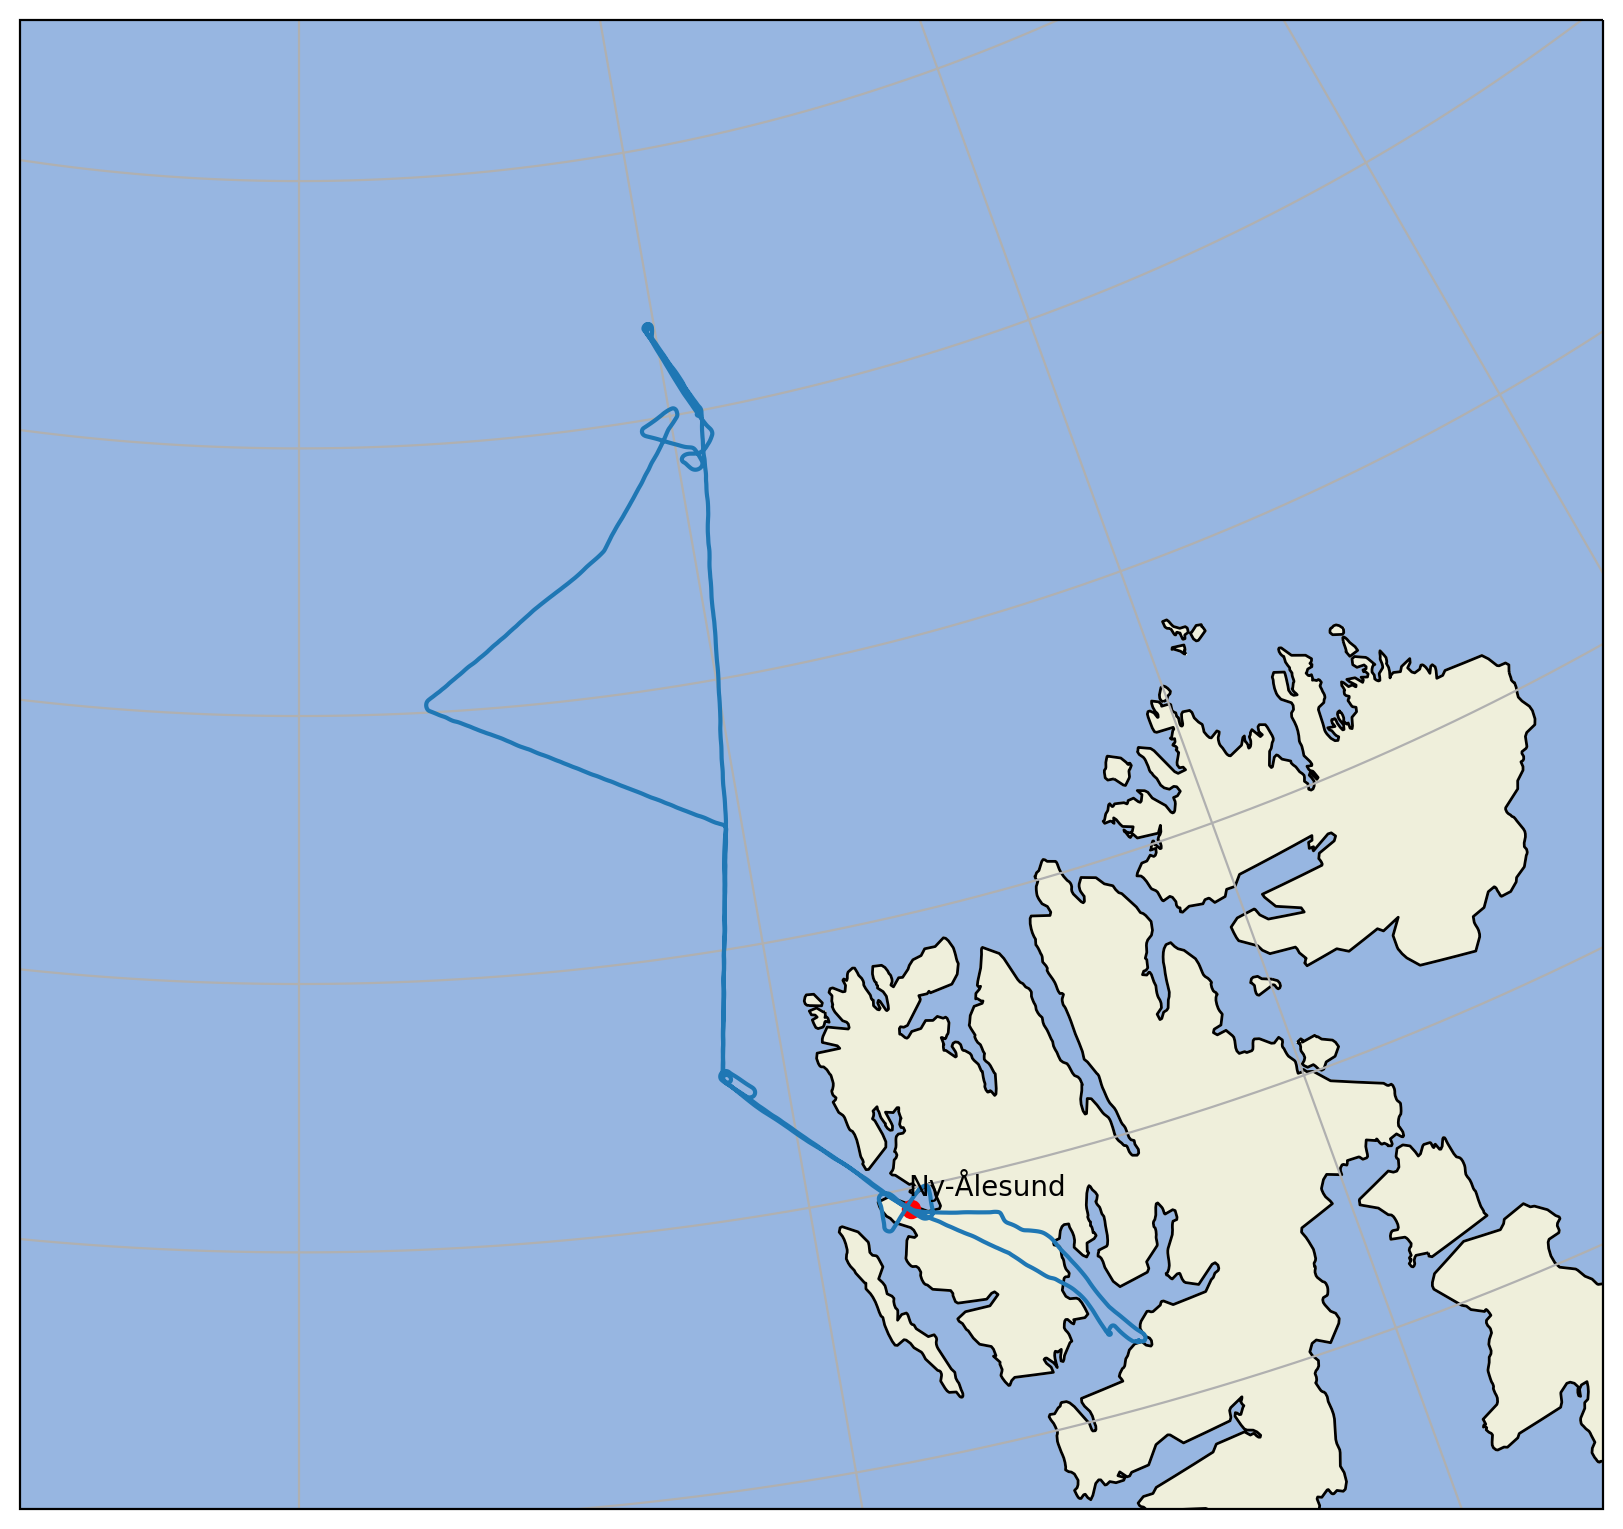

In [9]:
proj = ccrs.NorthPolarStereo()
extent = (-5.0, 24.0, 78.0, 83.0)

fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=proj)
ax.set_extent(extent)

ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)
ax.gridlines()
ax.coastlines()

nya_lat = 78.924444
nya_lon = 11.928611

ax.plot(nya_lon, nya_lat, 'ro', transform=ccrs.PlateCarree())
ax.text(nya_lon, nya_lat+0.05, 'Ny-Ålesund', transform=ccrs.PlateCarree())

line_all = ax.plot(ds_gps.lon, ds_gps.lat, transform=ccrs.PlateCarree())

plt.show()

### Query all segments of a specific kind

As an example only `high_level` flights are plotted in the following (only one kind of pattern):

In [10]:
queried = flight_query.selectKind(['high_level'])
queried

[{'dropsondes': [],
  'end': datetime.datetime(2017, 6, 8, 8, 25, 56),
  'irregularities': [],
  'kinds': ['high_level', 'nya_overflight'],
  'levels': [9800],
  'name': 'high level 1',
  'segment_id': 'ACLOUD_P5_RF14_hl01',
  'start': datetime.datetime(2017, 6, 8, 8, 8, 54)},
 {'dropsondes': ['ACLOUD_P5_RF14_DS01'],
  'end': datetime.datetime(2017, 6, 8, 8, 58, 25),
  'irregularities': [],
  'kinds': ['high_level'],
  'levels': [9800],
  'name': 'high level 2',
  'segment_id': 'ACLOUD_P5_RF14_hl02',
  'start': datetime.datetime(2017, 6, 8, 8, 36, 30)},
 {'dropsondes': ['ACLOUD_P5_RF14_DS02', 'ACLOUD_P5_RF14_DS03'],
  'end': datetime.datetime(2017, 6, 8, 9, 30, 29),
  'irregularities': [],
  'kinds': ['high_level', 'a-train_underflight'],
  'levels': [9700],
  'name': 'high level 3',
  'segment_id': 'ACLOUD_P5_RF14_hl03',
  'start': datetime.datetime(2017, 6, 8, 8, 59, 8)},
 {'dropsondes': ['ACLOUD_P5_RF14_DS04'],
  'end': datetime.datetime(2017, 6, 8, 9, 51, 3),
  'irregularities': []

Plot the selected segments:

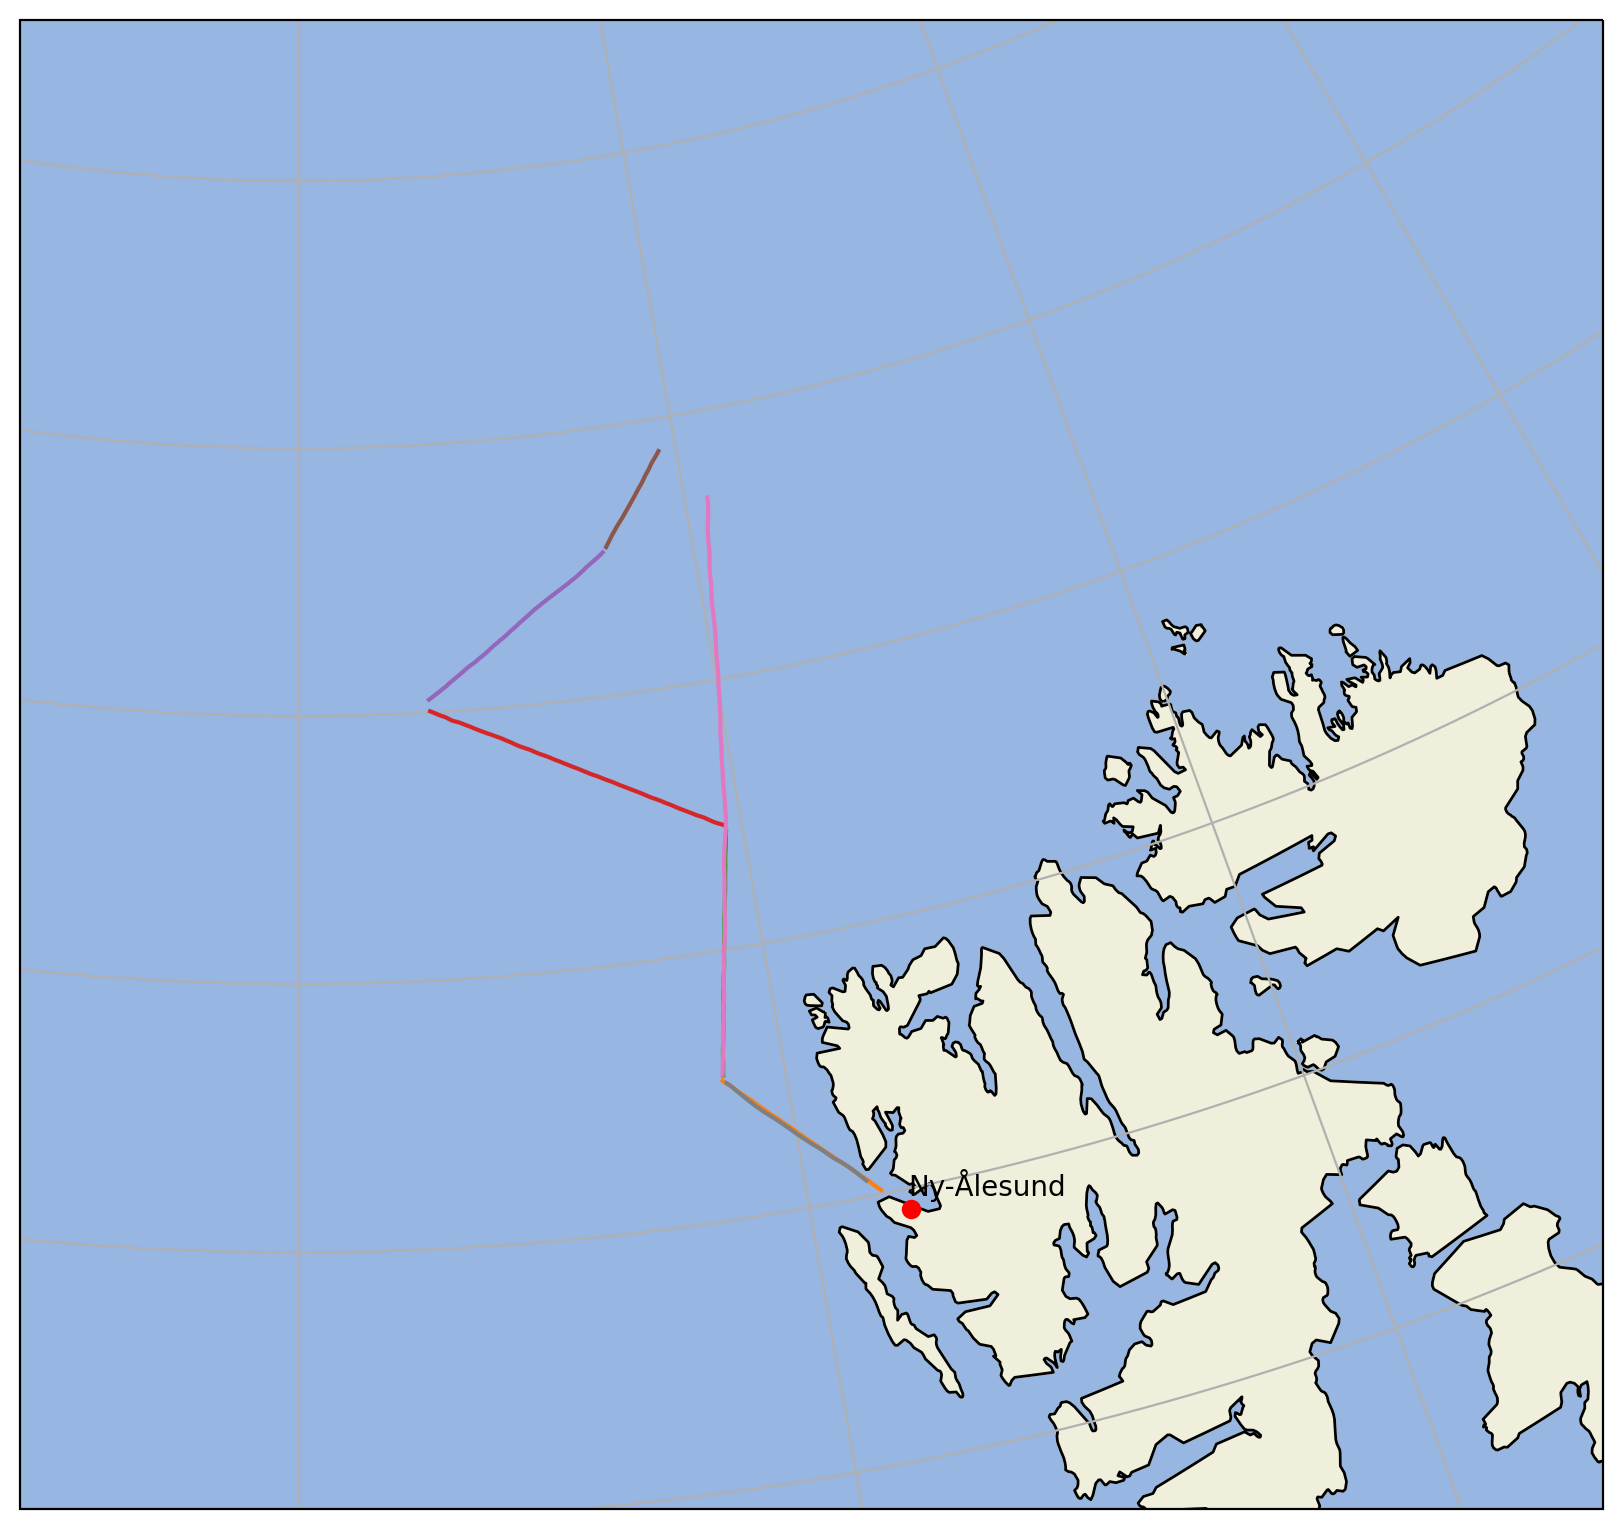

In [11]:
ll = line_all.pop(0)
ll.remove()

lines = []
for q in queried:
    start = q['start']
    end   = q['end']
    
    line = ax.plot(ds_gps.lon.sel(time=slice(start, end)),
                   ds_gps.lat.sel(time=slice(start, end)),
                   transform=ccrs.PlateCarree())
    lines.append(line)
    
fig

 Of course, also more than one kind of pattern can be selected:

In [12]:
kinds = ['a-train_underflight', 'nya_overflight', 'polarstern_overflight']

queried = flight_query.selectKind(kinds)
queried

[{'dropsondes': [],
  'end': datetime.datetime(2017, 6, 8, 8, 8, 53),
  'irregularities': ['whale-watching loop'],
  'kinds': ['major_ascend', 'nya_overflight', 'sveabreen_glacier_overflight'],
  'levels': [100, 9700],
  'name': 'major ascend',
  'segment_id': 'ACLOUD_P5_RF14_ma',
  'start': datetime.datetime(2017, 6, 8, 7, 36, 50)},
 {'dropsondes': [],
  'end': datetime.datetime(2017, 6, 8, 8, 25, 56),
  'irregularities': [],
  'kinds': ['high_level', 'nya_overflight'],
  'levels': [9800],
  'name': 'high level 1',
  'segment_id': 'ACLOUD_P5_RF14_hl01',
  'start': datetime.datetime(2017, 6, 8, 8, 8, 54)},
 {'dropsondes': ['ACLOUD_P5_RF14_DS02', 'ACLOUD_P5_RF14_DS03'],
  'end': datetime.datetime(2017, 6, 8, 9, 30, 29),
  'irregularities': [],
  'kinds': ['high_level', 'a-train_underflight'],
  'levels': [9700],
  'name': 'high level 3',
  'segment_id': 'ACLOUD_P5_RF14_hl03',
  'start': datetime.datetime(2017, 6, 8, 8, 59, 8)},
 {'dropsondes': ['ACLOUD_P5_RF14_DS05'],
  'end': datetime.

Plot the selected segments:

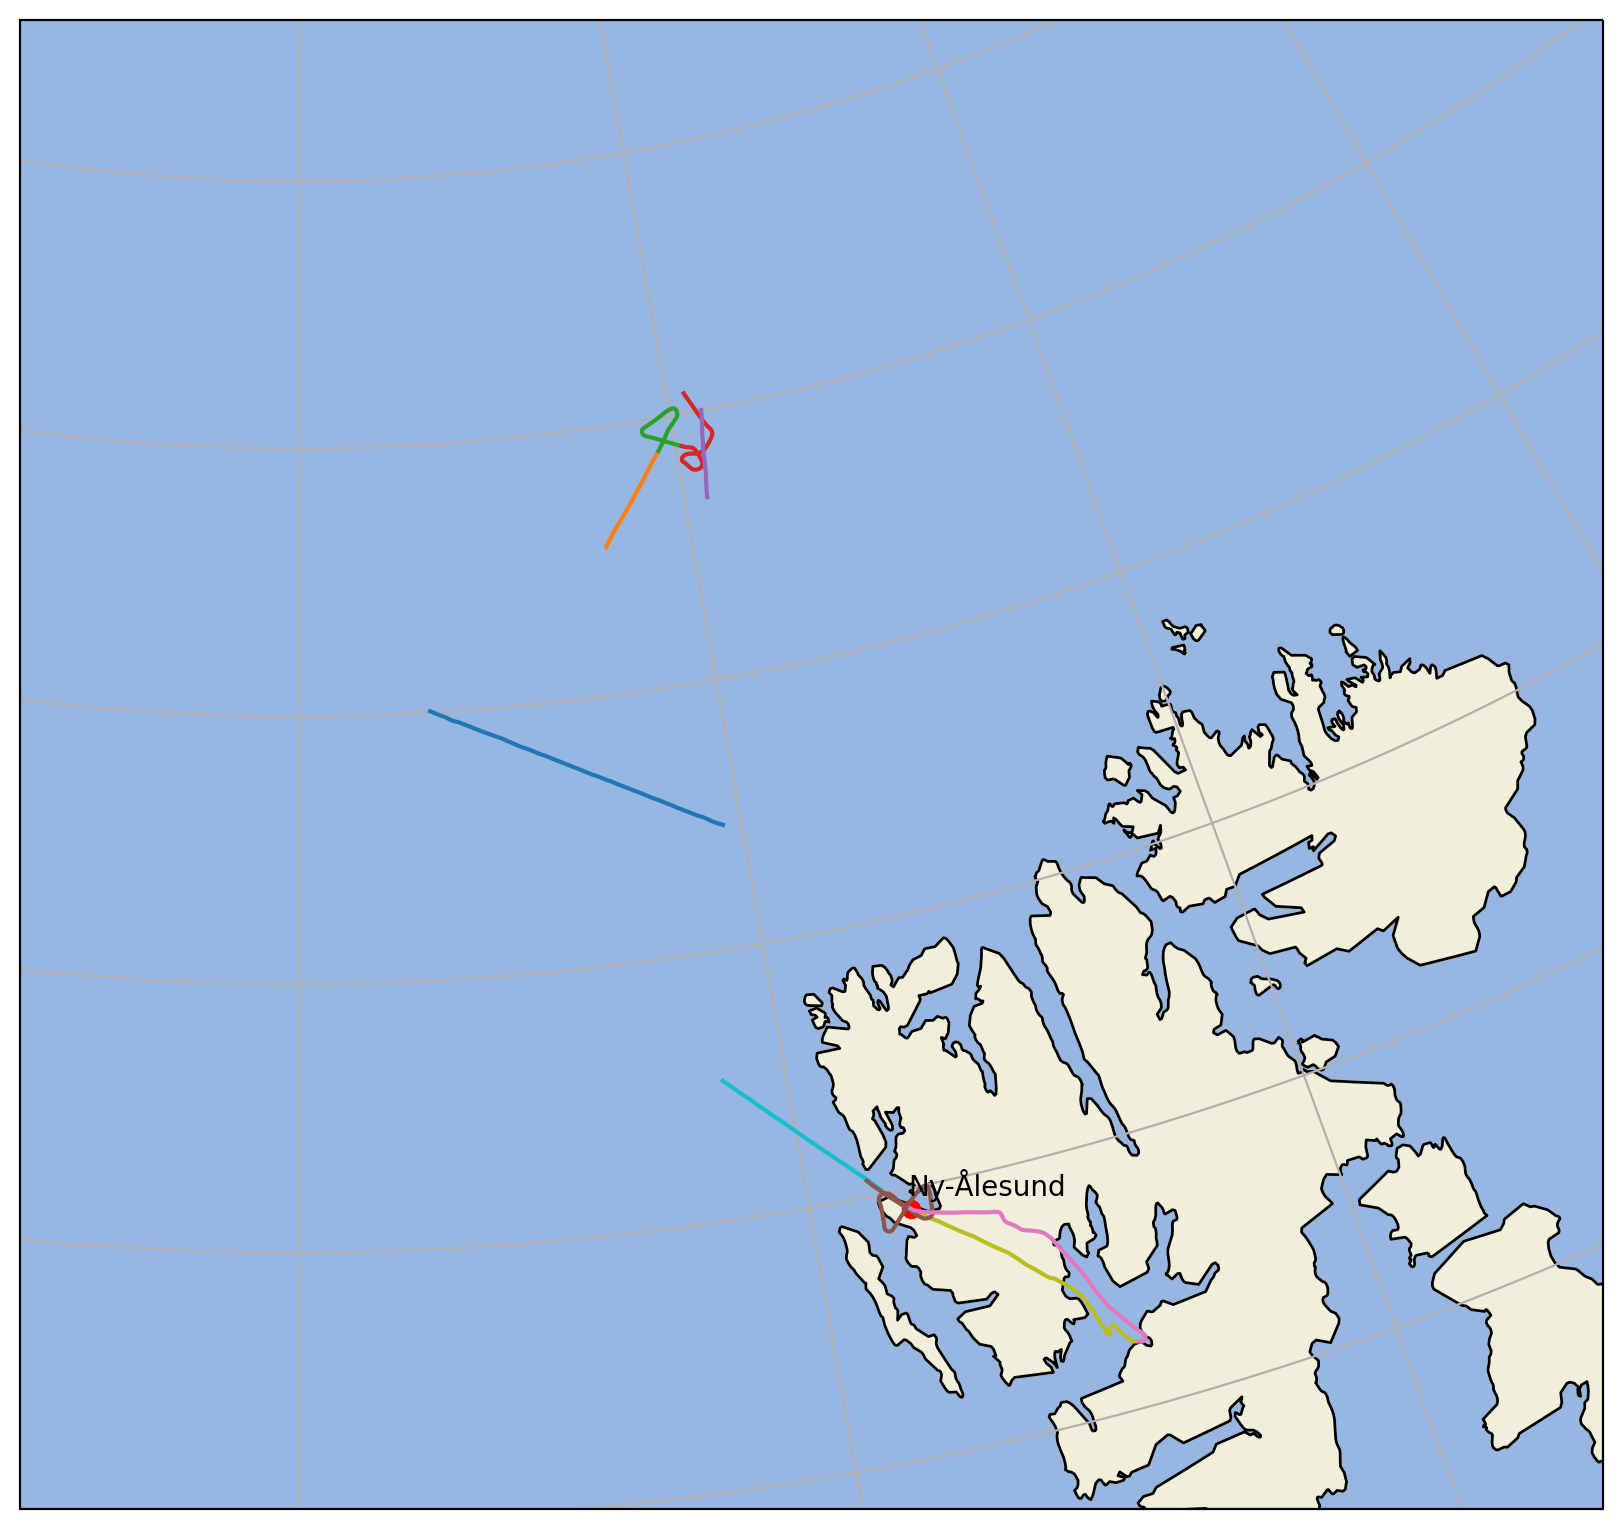

In [13]:
for l in lines:
    ll = l.pop(0)
    ll.remove()
    
lines = []
for q in queried:
    start = q['start']
    end   = q['end']
    
    line = ax.plot(ds_gps.lon.sel(time=slice(start, end)),
                   ds_gps.lat.sel(time=slice(start, end)),
                   transform=ccrs.PlateCarree())
    lines.append(line)
    
fig

### Sorting out all segments given a list of kinds

In [14]:
sort_out = ['short_turn', 'holding_pattern', 'major_ascent', 'major_descent', 'high_level']

queried = flight_query.selectKind(sort_out, invertSelection=True)
queried

[{'dropsondes': [],
  'end': datetime.datetime(2017, 6, 8, 8, 8, 53),
  'irregularities': ['whale-watching loop'],
  'kinds': ['major_ascend', 'nya_overflight', 'sveabreen_glacier_overflight'],
  'levels': [100, 9700],
  'name': 'major ascend',
  'segment_id': 'ACLOUD_P5_RF14_ma',
  'start': datetime.datetime(2017, 6, 8, 7, 36, 50)},
 {'dropsondes': [],
  'end': datetime.datetime(2017, 6, 8, 10, 10, 50),
  'irregularities': [],
  'kinds': ['cross_pattern', 'polarstern_overflight'],
  'levels': [9600, 9700],
  'name': 'cross pattern 1',
  'parts': [{'end': datetime.datetime(2017, 6, 8, 10, 3, 13),
    'irregularities': [],
    'kinds': ['high_level'],
    'levels': [9600],
    'name': 'cross pattern 1 leg 1',
    'segment_id': 'ACLOUD_P5_RF14_cr01_l01',
    'start': datetime.datetime(2017, 6, 8, 10, 0, 14)},
   {'end': datetime.datetime(2017, 6, 8, 10, 8, 12),
    'kinds': ['cross_pattern_turn'],
    'name': 'cross pattern turn',
    'start': datetime.datetime(2017, 6, 8, 10, 3, 14)},
 

Plot the selected segments:

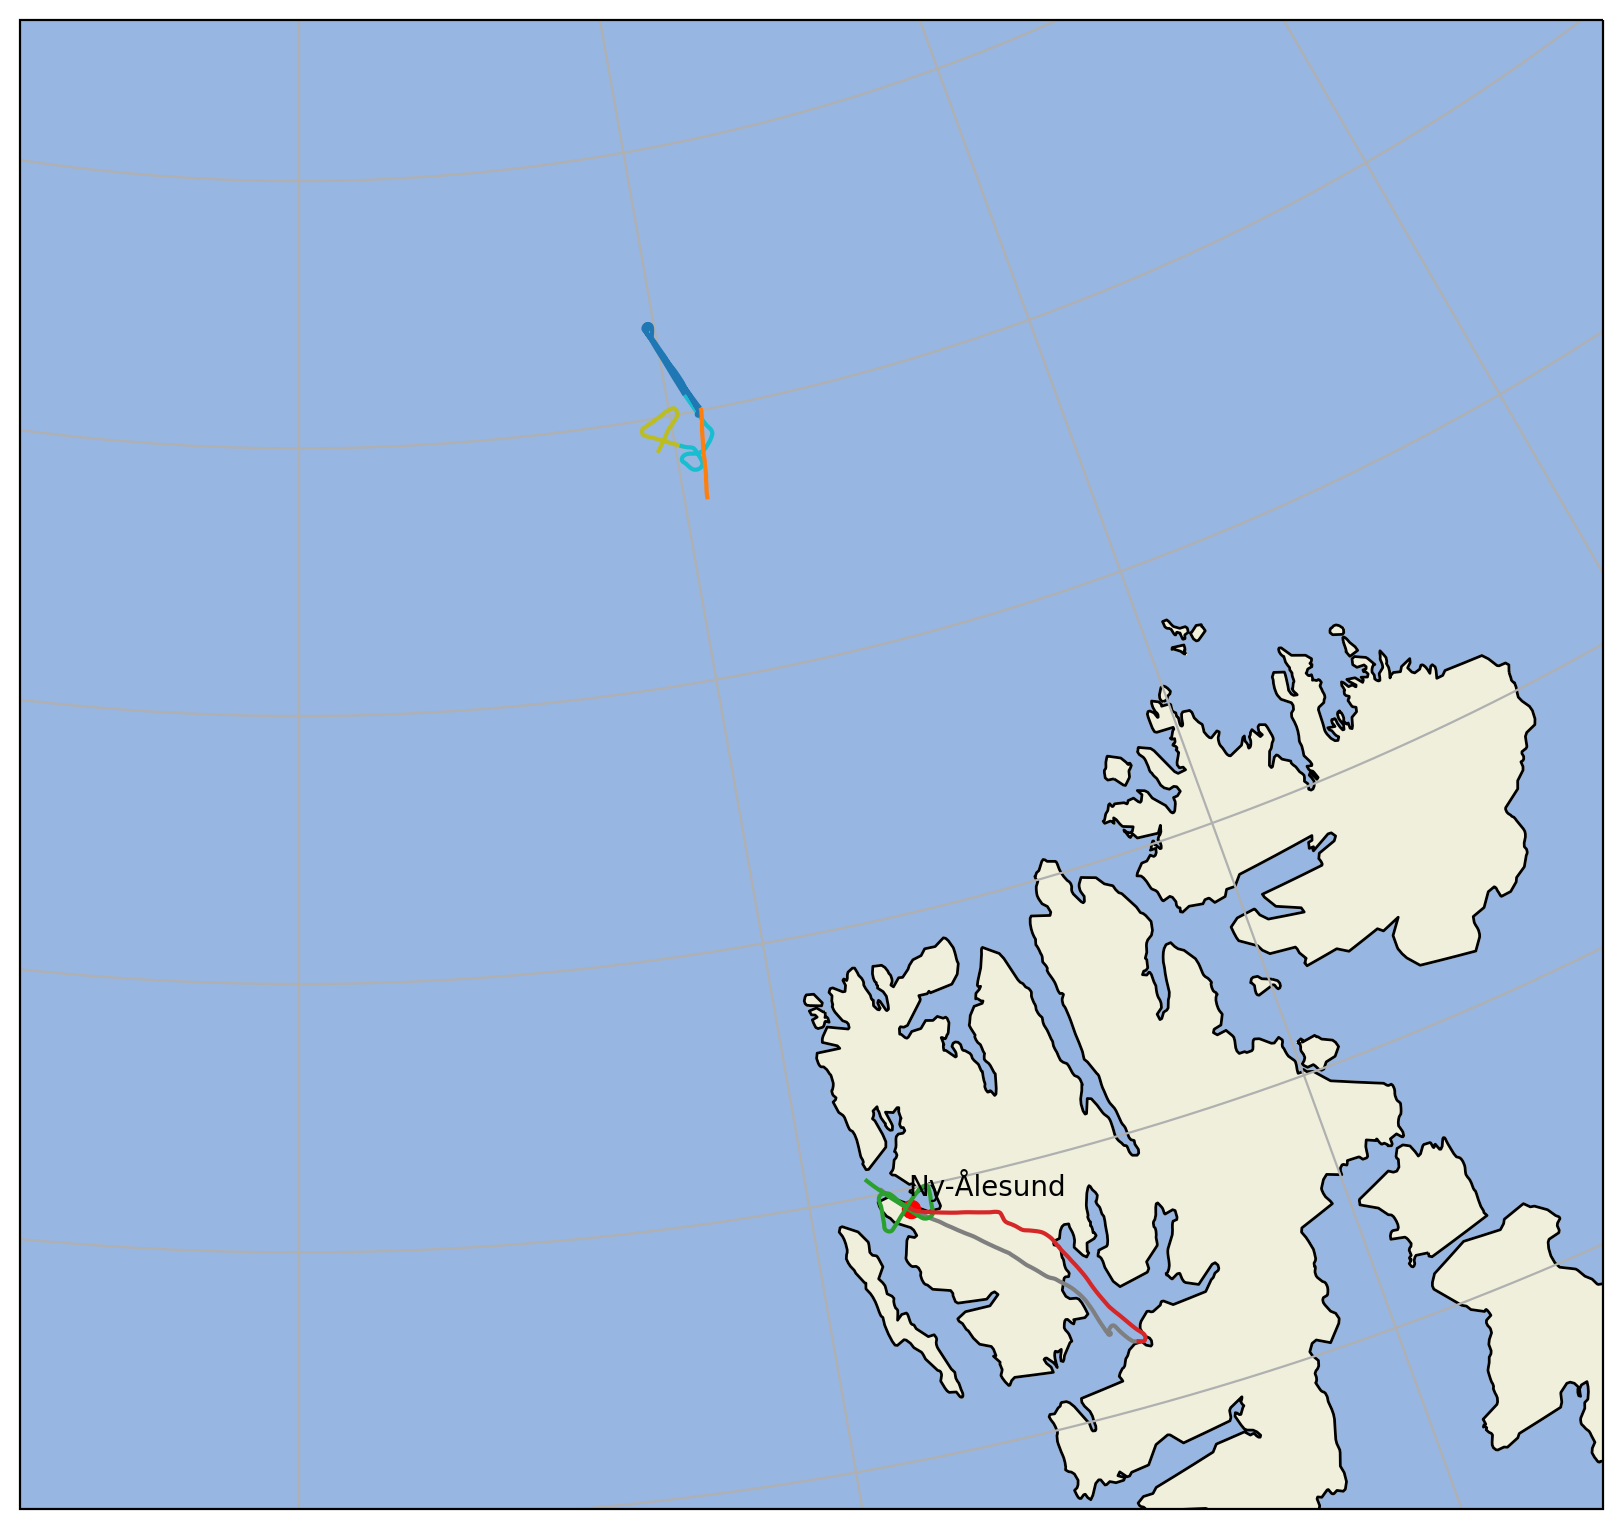

In [15]:
for l in lines:
    ll = l.pop(0)
    ll.remove()
    
lines = []
for q in queried:
    start = q['start']
    end   = q['end']
    
    line = ax.plot(ds_gps.lon.sel(time=slice(start, end)),
                   ds_gps.lat.sel(time=slice(start, end)),
                   transform=ccrs.PlateCarree())
    lines.append(line)
    
fig

### Query a segment with a specific value in a specific attribute

#### Example 1: Select element with specific name

In [16]:
attribute = 'name'
value = 'racetrack pattern 1'

queried = flight_query.select(attribute, value) 
queried

[{'dropsondes': [],
  'end': datetime.datetime(2017, 6, 8, 11, 2, 1),
  'irregularities': [],
  'kinds': ['racetrack_pattern'],
  'levels': [200, 300, 1500, 2400],
  'name': 'racetrack pattern 1',
  'parts': [{'end': datetime.datetime(2017, 6, 8, 10, 29, 20),
    'irregularities': [],
    'kinds': ['low_level'],
    'levels': [200],
    'name': 'racetrack pattern 1 leg 1',
    'segment_id': 'ACLOUD_P5_RF14_rt01_l01',
    'start': datetime.datetime(2017, 6, 8, 10, 22, 44)},
   {'end': datetime.datetime(2017, 6, 8, 10, 31, 40),
    'irregularities': [],
    'kinds': ['procedure_turn', 'small_ascend'],
    'levels': [200, 300],
    'name': 'racetrack pattern 1 ascend 1',
    'segment_id': 'ACLOUD_P5_RF14_rt01_a01',
    'start': datetime.datetime(2017, 6, 8, 10, 29, 21)},
   {'end': datetime.datetime(2017, 6, 8, 10, 40, 26),
    'irregularities': [],
    'kinds': ['low_level'],
    'levels': [300],
    'name': 'racetrack pattern 1 leg 2',
    'segment_id': 'ACLOUD_P5_RF14_rt01_l02',
    's

Plot the selected elements:

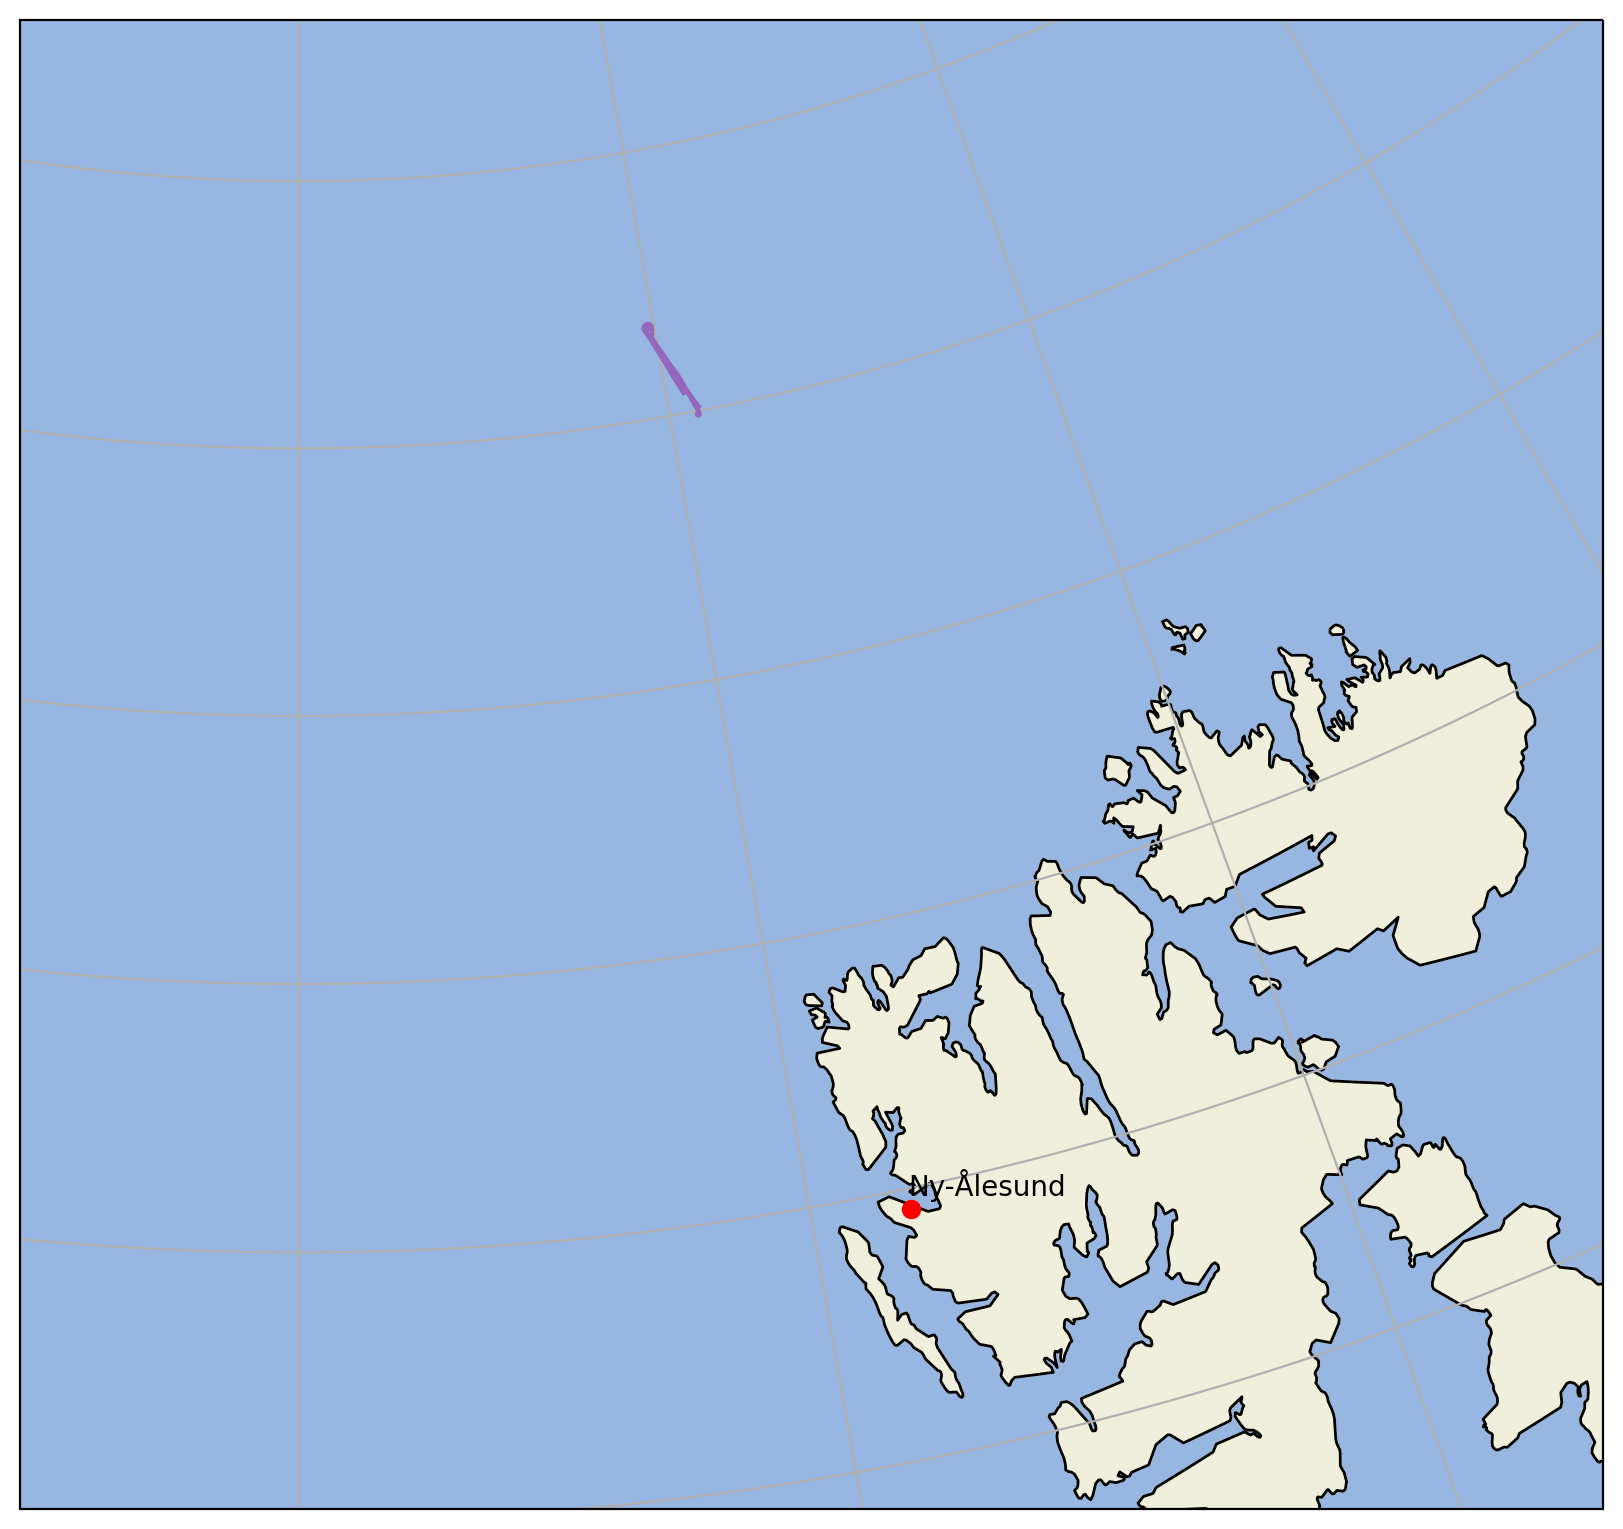

In [17]:
for l in lines:
    ll = l.pop(0)
    ll.remove()
    
lines = []
for q in queried:
    start = q['start']
    end   = q['end']
    
    line = ax.plot(ds_gps.lon.sel(time=slice(start, end)),
                   ds_gps.lat.sel(time=slice(start, end)),
                   transform=ccrs.PlateCarree())
    lines.append(line)
    
fig

Also with inverted selection:

In [18]:
queried = flight_query.select(attribute, value, invertSelection=True) 
queried

[{'dropsondes': [],
  'end': datetime.datetime(2017, 6, 8, 8, 8, 53),
  'irregularities': ['whale-watching loop'],
  'kinds': ['major_ascend', 'nya_overflight', 'sveabreen_glacier_overflight'],
  'levels': [100, 9700],
  'name': 'major ascend',
  'segment_id': 'ACLOUD_P5_RF14_ma',
  'start': datetime.datetime(2017, 6, 8, 7, 36, 50)},
 {'dropsondes': [],
  'end': datetime.datetime(2017, 6, 8, 8, 25, 56),
  'irregularities': [],
  'kinds': ['high_level', 'nya_overflight'],
  'levels': [9800],
  'name': 'high level 1',
  'segment_id': 'ACLOUD_P5_RF14_hl01',
  'start': datetime.datetime(2017, 6, 8, 8, 8, 54)},
 {'dropsondes': [],
  'end': datetime.datetime(2017, 6, 8, 8, 36, 29),
  'irregularities': [],
  'kinds': ['holding_pattern'],
  'levels': [9800, 9800],
  'name': 'holding pattern 1',
  'parts': [{'end': datetime.datetime(2017, 6, 8, 8, 27, 32),
    'kinds': ['short_turn'],
    'name': 'short turn',
    'start': datetime.datetime(2017, 6, 8, 8, 25, 57)},
   {'end': datetime.datetime(

Plot the selected elements:

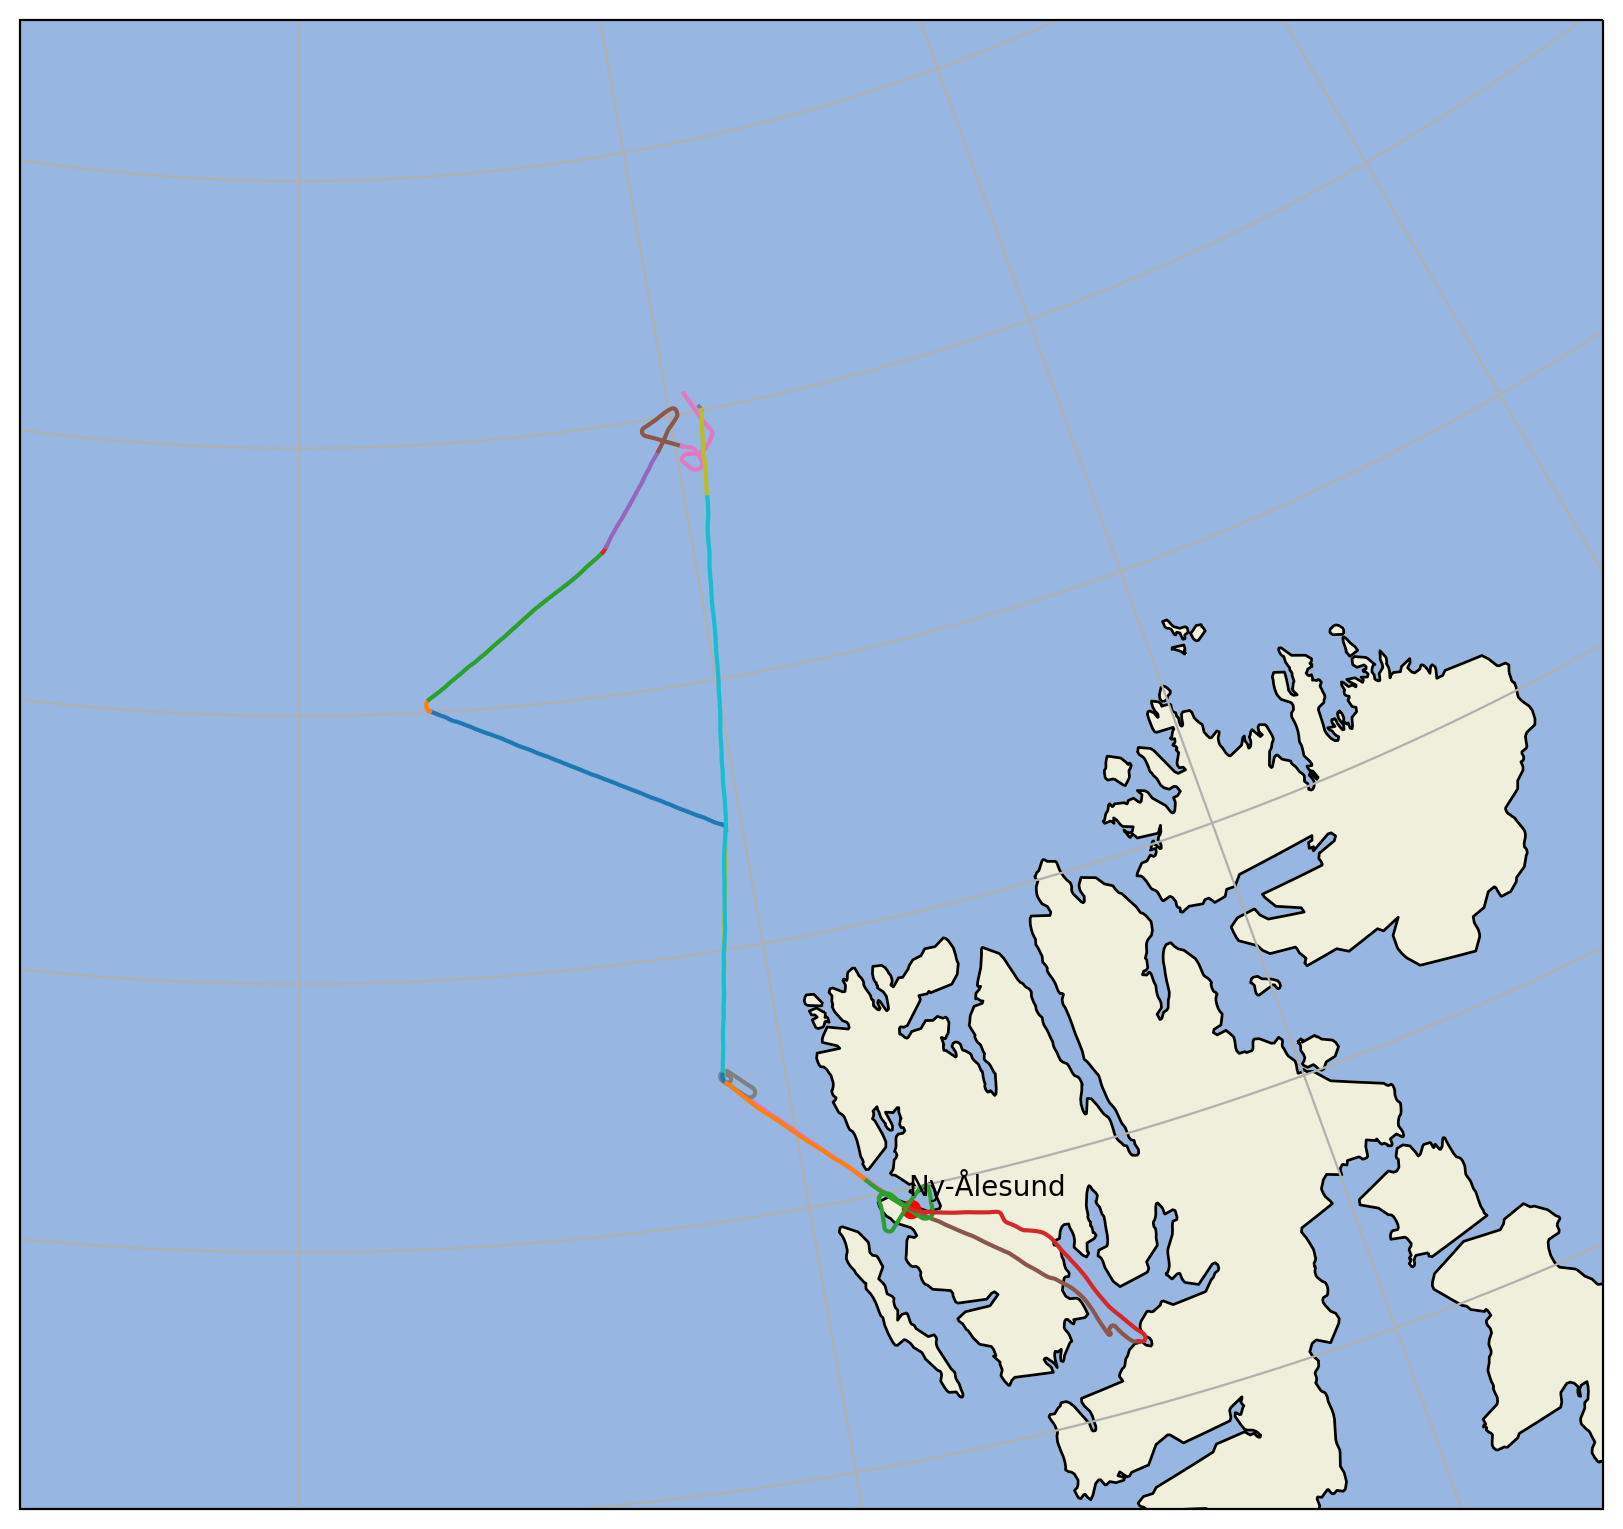

In [19]:
for l in lines:
    ll = l.pop(0)
    ll.remove()
    
lines = []
for q in queried:
    start = q['start']
    end   = q['end']
    
    line = ax.plot(ds_gps.lon.sel(time=slice(start, end)),
                   ds_gps.lat.sel(time=slice(start, end)),
                   transform=ccrs.PlateCarree())
    lines.append(line)
    
fig

#### Example 2: Specific level

In [20]:
attribute = 'levels'
value = 9800

queried = flight_query.select(attribute, value)
queried

[{'dropsondes': [],
  'end': datetime.datetime(2017, 6, 8, 8, 25, 56),
  'irregularities': [],
  'kinds': ['high_level', 'nya_overflight'],
  'levels': [9800],
  'name': 'high level 1',
  'segment_id': 'ACLOUD_P5_RF14_hl01',
  'start': datetime.datetime(2017, 6, 8, 8, 8, 54)},
 {'dropsondes': [],
  'end': datetime.datetime(2017, 6, 8, 8, 36, 29),
  'irregularities': [],
  'kinds': ['holding_pattern'],
  'levels': [9800, 9800],
  'name': 'holding pattern 1',
  'parts': [{'end': datetime.datetime(2017, 6, 8, 8, 27, 32),
    'kinds': ['short_turn'],
    'name': 'short turn',
    'start': datetime.datetime(2017, 6, 8, 8, 25, 57)},
   {'end': datetime.datetime(2017, 6, 8, 8, 29, 27),
    'irregularities': [],
    'kinds': ['high_level'],
    'levels': [9800],
    'name': 'holding pattern 1 leg 1',
    'segment_id': 'ACLOUD_P5_RF14_ho01_l01',
    'start': datetime.datetime(2017, 6, 8, 8, 27, 33)},
   {'end': datetime.datetime(2017, 6, 8, 8, 31, 9),
    'kinds': ['short_turn'],
    'name': 's

Plot the selected elements:

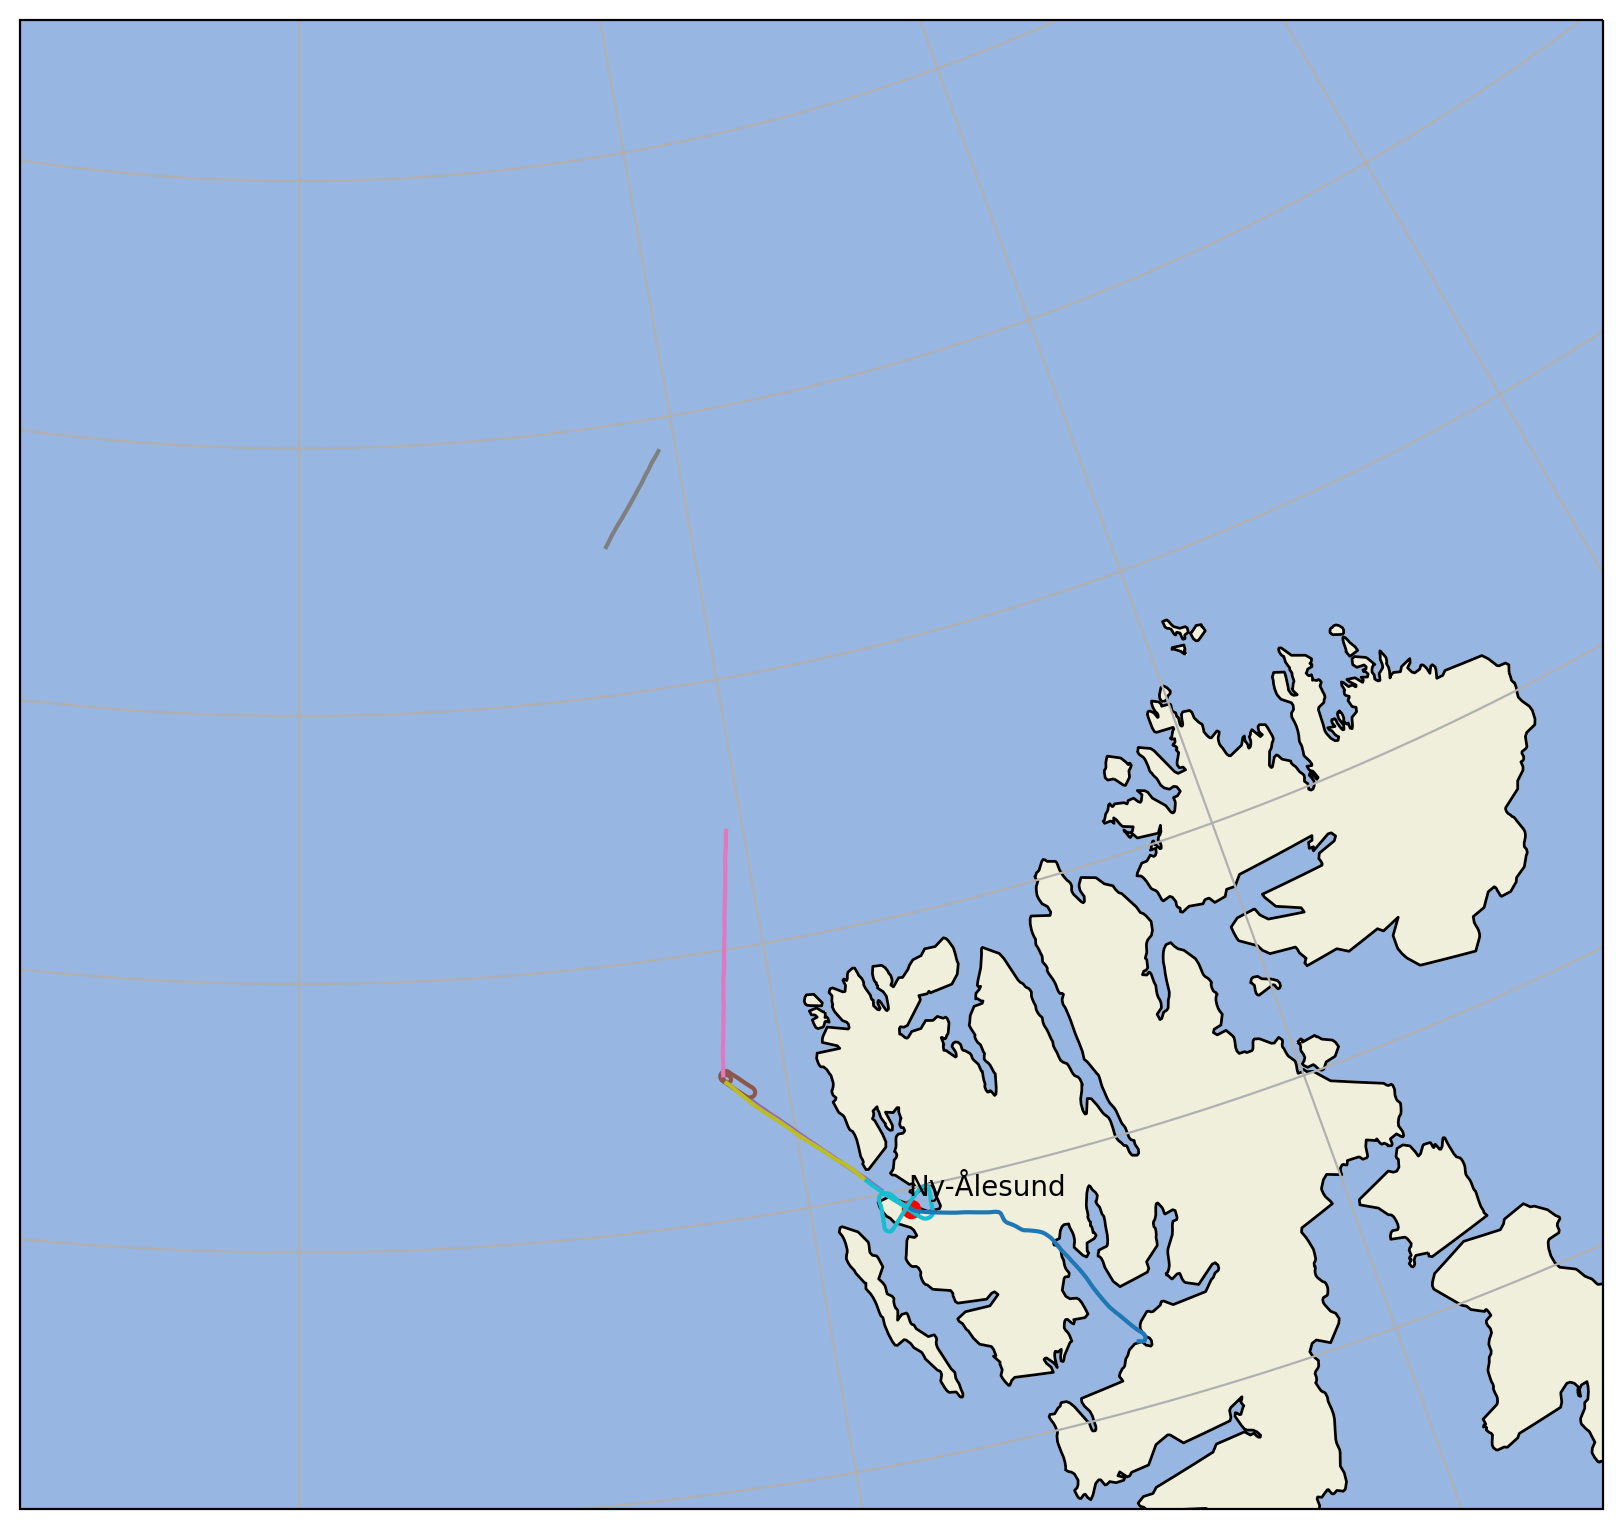

In [21]:
for l in lines:
    ll = l.pop(0)
    ll.remove()
    
lines = []
for q in queried:
    start = q['start']
    end   = q['end']
    
    line = ax.plot(ds_gps.lon.sel(time=slice(start, end)),
                   ds_gps.lat.sel(time=slice(start, end)),
                   transform=ccrs.PlateCarree())
    lines.append(line)
    
fig

But what if we want only a specific level without ascent and descent? We can require that the attribute value is strictly equal to the one, that we give, i.e. there are no other values:

In [22]:
queried = flight_query.select(attribute, value, strict=True)
queried

[{'dropsondes': [],
  'end': datetime.datetime(2017, 6, 8, 8, 25, 56),
  'irregularities': [],
  'kinds': ['high_level', 'nya_overflight'],
  'levels': [9800],
  'name': 'high level 1',
  'segment_id': 'ACLOUD_P5_RF14_hl01',
  'start': datetime.datetime(2017, 6, 8, 8, 8, 54)},
 {'dropsondes': ['ACLOUD_P5_RF14_DS01'],
  'end': datetime.datetime(2017, 6, 8, 8, 58, 25),
  'irregularities': [],
  'kinds': ['high_level'],
  'levels': [9800],
  'name': 'high level 2',
  'segment_id': 'ACLOUD_P5_RF14_hl02',
  'start': datetime.datetime(2017, 6, 8, 8, 36, 30)},
 {'dropsondes': ['ACLOUD_P5_RF14_DS05'],
  'end': datetime.datetime(2017, 6, 8, 10, 0, 13),
  'irregularities': [],
  'kinds': ['high_level', 'polarstern_overflight'],
  'levels': [9800],
  'name': 'high level 5',
  'segment_id': 'ACLOUD_P5_RF14_hl05',
  'start': datetime.datetime(2017, 6, 8, 9, 51, 33)},
 {'dropsondes': ['ACLOUD_P5_RF14_DS06'],
  'end': datetime.datetime(2017, 6, 8, 12, 5, 13),
  'irregularities': [],
  'kinds': ['high

This functions only if the attribute has more values, as for level or kind. Now plot the selected elements:

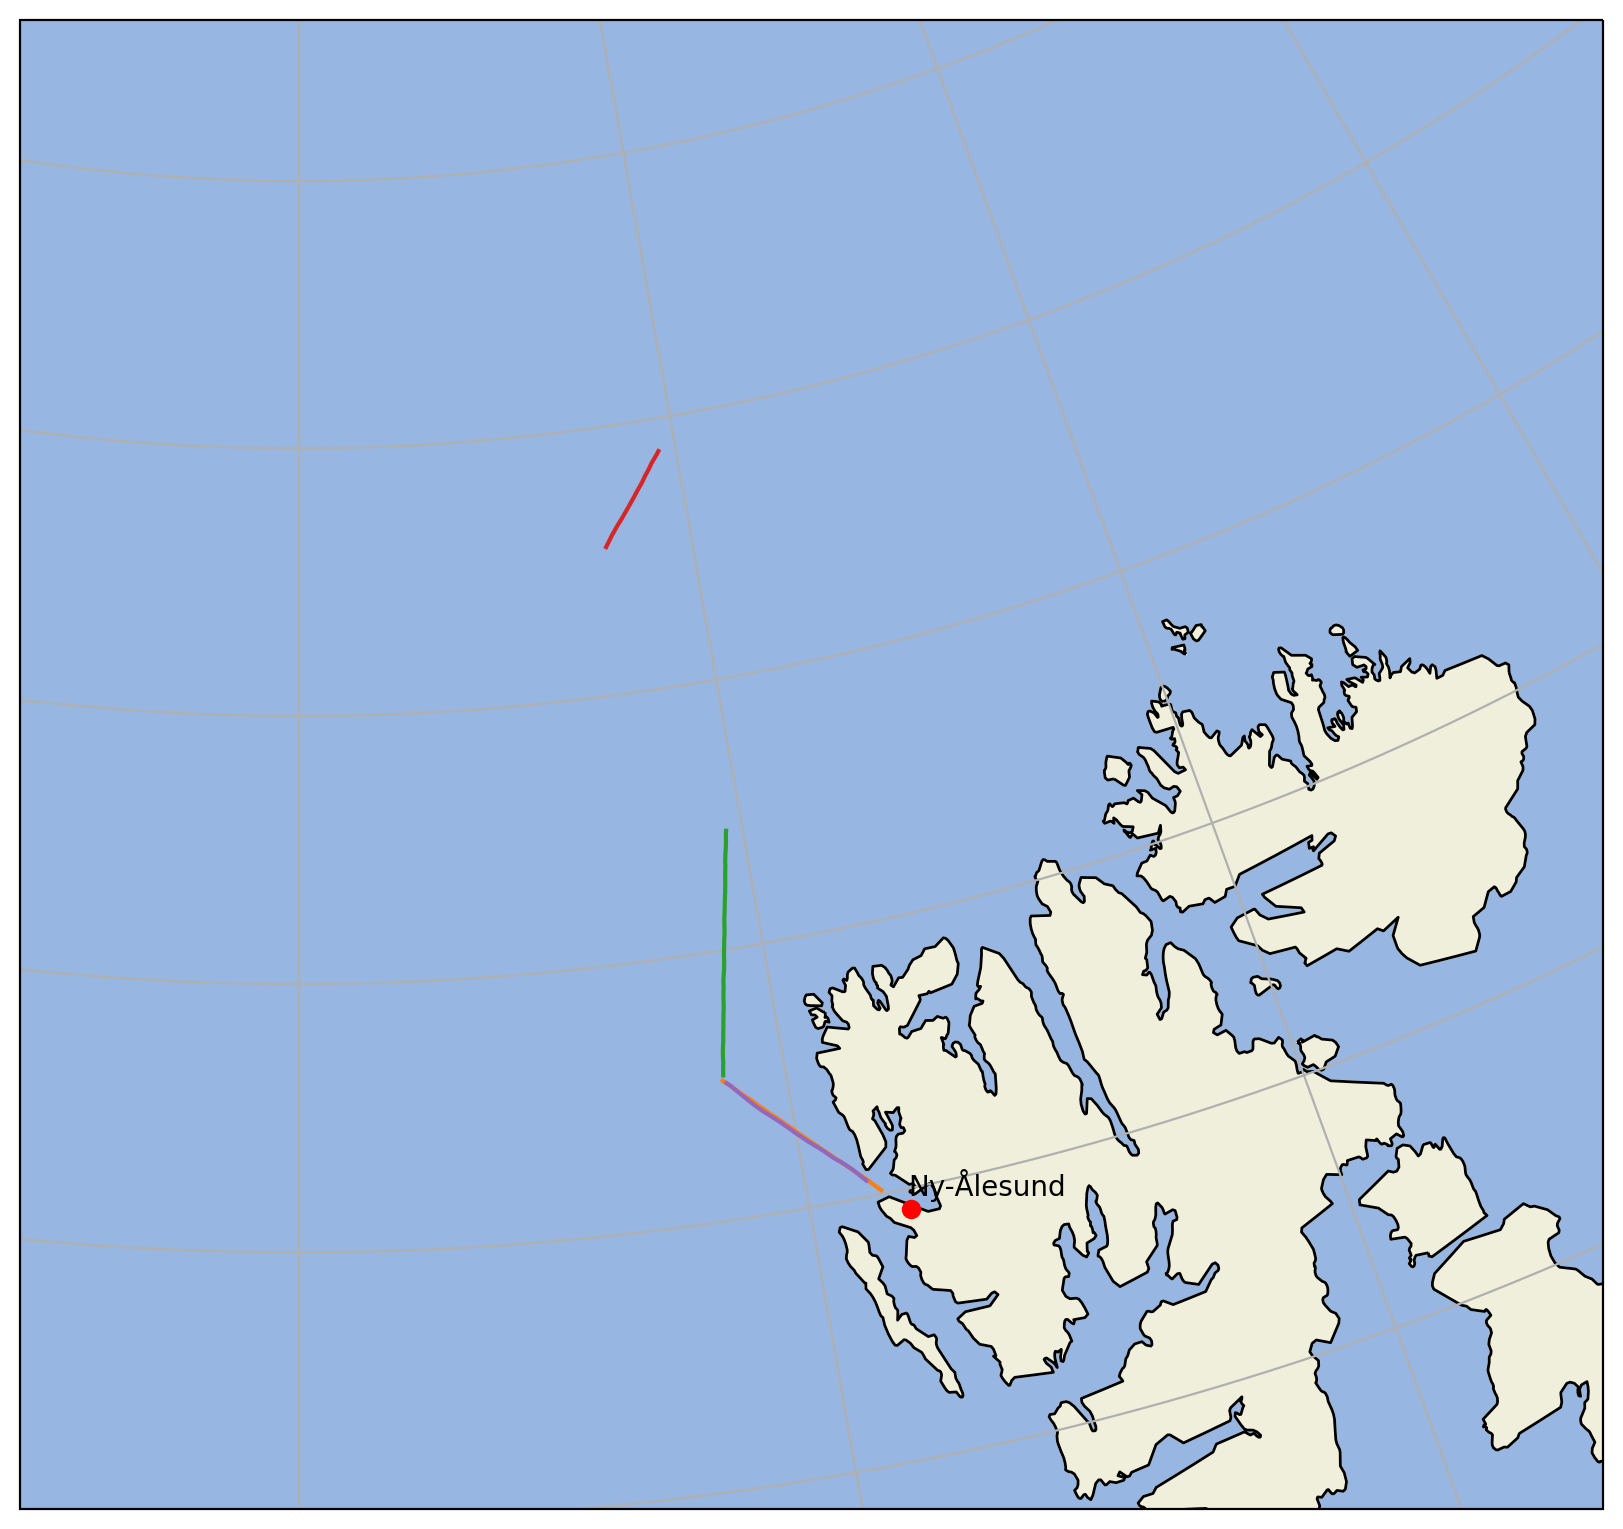

In [23]:
for l in lines:
    ll = l.pop(0)
    ll.remove()
    
lines = []
for q in queried:
    start = q['start']
    end   = q['end']
    
    line = ax.plot(ds_gps.lon.sel(time=slice(start, end)),
                   ds_gps.lat.sel(time=slice(start, end)),
                   transform=ccrs.PlateCarree())
    lines.append(line)
    
fig

## Warnings

In the previous cells warnings were intentionally suppressed. But the flightphase tools normally also show a warning if some of the selected segments contain so-called "irregularities". So we first reactivate the warnings:

In [24]:
warnings.simplefilter("always")

We repeat one of the previous examples in order to show how the warnings of the flightphase tools look like:

In [25]:
kinds = ['a-train_underflight', 'nya_overflight', 'polarstern_overflight']

queried = flight_query.selectKind(kinds)
queried

/home/mech/.local/lib/python3.8/site-packages/ac3airborne/tools/flightphase.py:27: UserWarning: the segment ACLOUD_P5_RF14_ma contains following irregularities: whale-watching loop
  warnings.warn(str)
/home/mech/.local/lib/python3.8/site-packages/ac3airborne/tools/flightphase.py:27: UserWarning: the segment ACLOUD_P5_RF14_ld01 contains following irregularities: not along straight line
  warnings.warn(str)


[{'dropsondes': [],
  'end': datetime.datetime(2017, 6, 8, 8, 8, 53),
  'irregularities': ['whale-watching loop'],
  'kinds': ['major_ascend', 'nya_overflight', 'sveabreen_glacier_overflight'],
  'levels': [100, 9700],
  'name': 'major ascend',
  'segment_id': 'ACLOUD_P5_RF14_ma',
  'start': datetime.datetime(2017, 6, 8, 7, 36, 50)},
 {'dropsondes': [],
  'end': datetime.datetime(2017, 6, 8, 8, 25, 56),
  'irregularities': [],
  'kinds': ['high_level', 'nya_overflight'],
  'levels': [9800],
  'name': 'high level 1',
  'segment_id': 'ACLOUD_P5_RF14_hl01',
  'start': datetime.datetime(2017, 6, 8, 8, 8, 54)},
 {'dropsondes': ['ACLOUD_P5_RF14_DS02', 'ACLOUD_P5_RF14_DS03'],
  'end': datetime.datetime(2017, 6, 8, 9, 30, 29),
  'irregularities': [],
  'kinds': ['high_level', 'a-train_underflight'],
  'levels': [9700],
  'name': 'high level 3',
  'segment_id': 'ACLOUD_P5_RF14_hl03',
  'start': datetime.datetime(2017, 6, 8, 8, 59, 8)},
 {'dropsondes': ['ACLOUD_P5_RF14_DS05'],
  'end': datetime.

The first part of the warning tells us which segment is generating the warning. In this case we have two warnings generated by the segments `ACLOUD_P5_RF14_ma` and `ACLOUD_P5_RF14_ld01`. The second part is the value of the attribute `irregularities`.  A warning is generated when this attribute is not empty. You can access the content of this attribute even if the warnings are suppressed, as you can see in the examples above.

## Select a segment at a specific time or within a specific time range

If you want to select all the segments within a specific time range you can do it with the function `findSegments` which takes as parameters the start time and the end time in the `%Y-%m-%d %H:%M:%S` format.

In [26]:
starttime = '2017-06-08 12:15:00'
endtime   = '2017-06-08 12:45:00'

queried = flight_query.findSegments(starttime, endtime)
queried

[{'dropsondes': [],
  'end': datetime.datetime(2017, 6, 8, 12, 25, 39),
  'irregularities': [],
  'kinds': ['cross_pattern', 'nya_overflight'],
  'levels': [9800, 9800, 9800],
  'name': 'cross pattern 2',
  'parts': [{'end': datetime.datetime(2017, 6, 8, 12, 10, 13),
    'irregularities': [],
    'kinds': ['high_level'],
    'levels': [9800],
    'name': 'cross pattern 2 leg 1',
    'segment_id': 'ACLOUD_P5_RF14_cr02_l01',
    'start': datetime.datetime(2017, 6, 8, 12, 5, 14)},
   {'end': datetime.datetime(2017, 6, 8, 12, 14, 41),
    'kinds': ['cross_pattern_turn'],
    'name': 'cross pattern turn',
    'start': datetime.datetime(2017, 6, 8, 12, 10, 14)},
   {'end': datetime.datetime(2017, 6, 8, 12, 18, 50),
    'irregularities': [],
    'kinds': ['high_level'],
    'levels': [9800],
    'name': 'cross pattern 2 leg 2',
    'segment_id': 'ACLOUD_P5_RF14_cr02_l02',
    'start': datetime.datetime(2017, 6, 8, 12, 14, 42)},
   {'end': datetime.datetime(2017, 6, 8, 12, 24, 14),
    'kinds'

For a single time point you just take the end time to be the same as the start time

In [27]:
starttime = '2017-06-08 12:00:00'
endtime   = starttime

queried = flight_query.findSegments(starttime, endtime)
queried

[{'dropsondes': ['ACLOUD_P5_RF14_DS06'],
  'end': datetime.datetime(2017, 6, 8, 12, 5, 13),
  'irregularities': [],
  'kinds': ['high_level'],
  'levels': [9800],
  'name': 'high level 7',
  'segment_id': 'ACLOUD_P5_RF14_hl07',
  'start': datetime.datetime(2017, 6, 8, 11, 53, 38)}]

Type:        FlightPhaseFile
String form: <ac3airborne.tools.flightphase.FlightPhaseFile object at 0x7ff1974b4850>
File:        ~/.local/lib/python3.8/site-packages/ac3airborne/tools/flightphase.py
Docstring:  
The FlightPhaseFile object stores the yaml content of a flight phase file
and offers some methods used to query specific flight segments based on
some properties.

Parameters
----------
yaml_content : object
    The object returned by ac3airborne.get_flight_segments() after having
    specified research aircraft and research flight.
